In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('synthetic_esg_data_with_company_names.csv')

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 50 non-null     object 
 1   Industry                50 non-null     object 
 2   Country                 50 non-null     object 
 3   Year                    50 non-null     int64  
 4   Environmental_Score     50 non-null     int64  
 5   Social_Score            50 non-null     int64  
 6   Governance_Score        50 non-null     int64  
 7   ESG_Score               50 non-null     float64
 8   Market_Cap (Billion $)  50 non-null     float64
 9   Revenue (Billion $)     50 non-null     float64
 10  Net_Profit (%)          50 non-null     float64
 11  Stock_Price             50 non-null     float64
 12  News_Sentiment          50 non-null     object 
 13  CO2_Emissions (Tonnes)  50 non-null     int64  
dtypes: float64(5), int64(5), object(4)
memory us

YEARLY ESG TRENDS

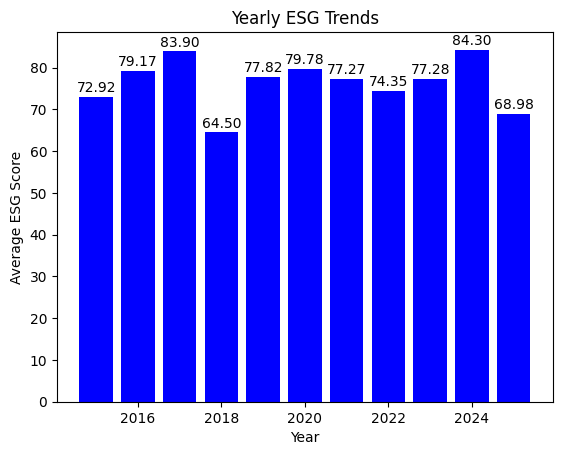

In [4]:
yearly_trends = data.groupby('Year')['ESG_Score'].mean()
plt.bar(yearly_trends.index, yearly_trends.values, color='blue')

for i, v in enumerate(yearly_trends.values):
    plt.text(yearly_trends.index[i], v + 0.5, f'{v:.2f}', ha='center', va='bottom')

plt.title('Yearly ESG Trends')
plt.xlabel('Year')
plt.ylabel('Average ESG Score')
plt.show()


SECTOR-WISE ESG SCORES


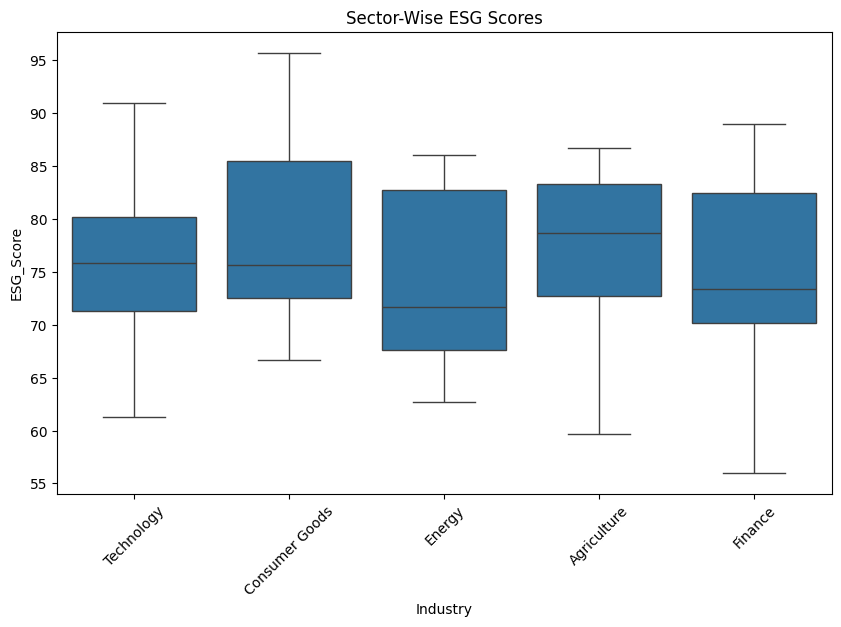

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Industry', y='ESG_Score')
plt.xticks(rotation=45)
plt.title('Sector-Wise ESG Scores')
plt.show()


CORRELATION MATRIX


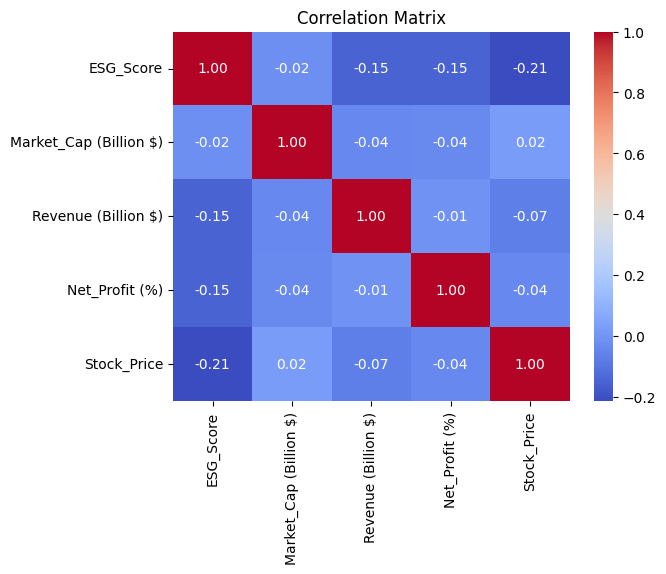

In [6]:
correlation_matrix = data[['ESG_Score', 'Market_Cap (Billion $)', 'Revenue (Billion $)', 'Net_Profit (%)', 'Stock_Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


SIMPLE AVERAGE-BASED FORECAST


In [9]:
if len(data) > 0:
    avg_score = data['ESG_Score'].mean()
    forecast = [avg_score] * 3
    print(f"Simple average-based forecast: {forecast}")


Simple average-based forecast: [76.094, 76.094, 76.094]


CO2 EMISSIONS VS ESG SCORE


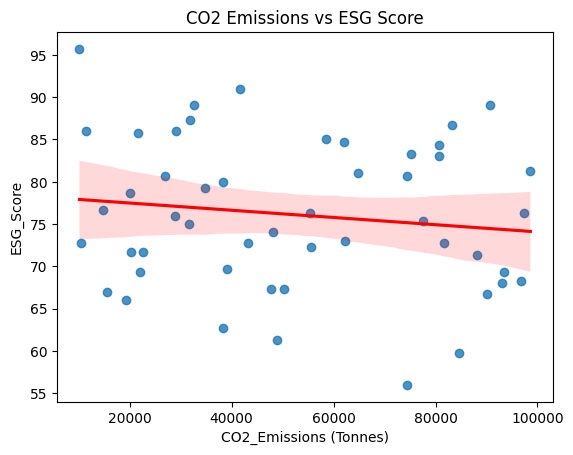

In [10]:
sns.regplot(data=data, x='CO2_Emissions (Tonnes)', y='ESG_Score', line_kws={"color": "red"})
plt.title('CO2 Emissions vs ESG Score')
plt.show()


ESG SCORE TREND OVER TIME


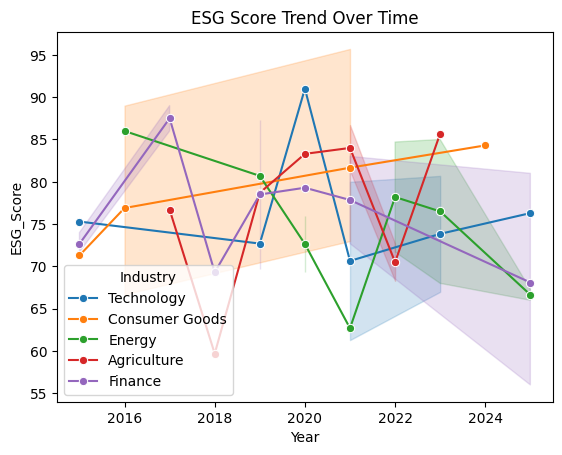

In [11]:
sns.lineplot(data=data, x='Year', y='ESG_Score', hue='Industry', marker='o')
plt.title('ESG Score Trend Over Time')
plt.show()


AVERAGE ESG SCORE BY COUNTRY


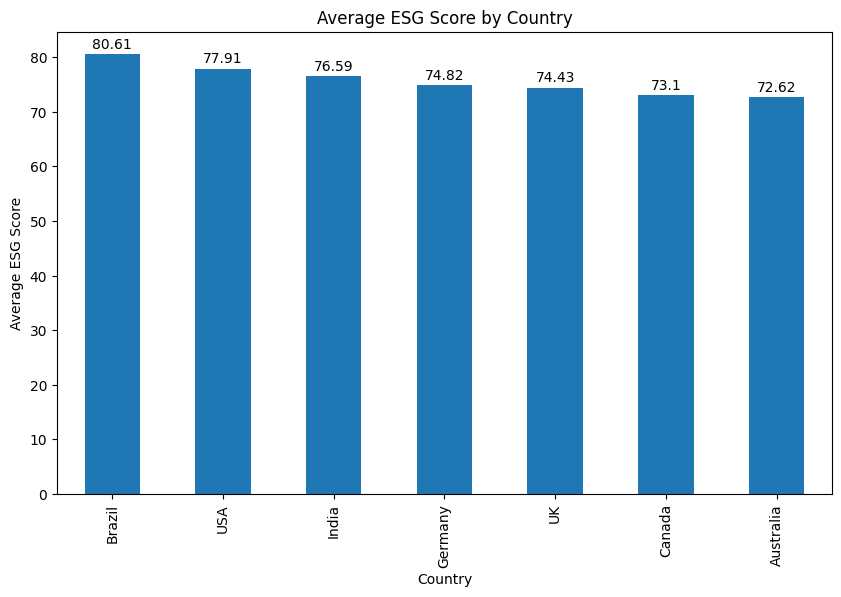

In [12]:
region_scores = data.groupby('Country')['ESG_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = region_scores.plot(kind='bar', title='Average ESG Score by Country')
plt.ylabel('Average ESG Score')

for i, v in enumerate(region_scores):
    ax.text(i, v + 0.5, round(v, 2), ha='center', va='bottom', fontsize=10)

plt.show()

DISTRIBUTION OF ESG SCORES


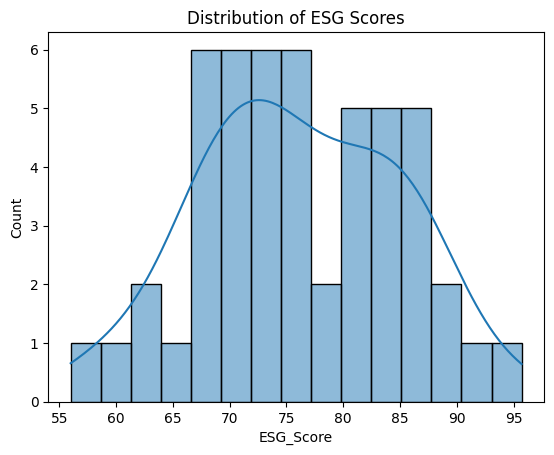

In [13]:
sns.histplot(data['ESG_Score'], kde=True, bins=15)
plt.title('Distribution of ESG Scores')
plt.show()


AVERAGE ESG SCORES BY INDUSTRY


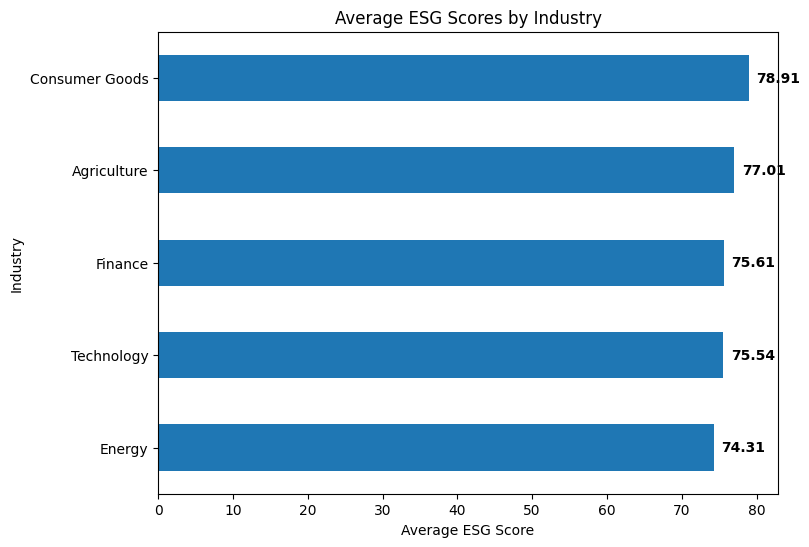

In [15]:
industry_scores = data.groupby('Industry')['ESG_Score'].mean().sort_values()

ax = industry_scores.plot(kind='barh', figsize=(8, 6), title='Average ESG Scores by Industry')
plt.xlabel('Average ESG Score')

for i, v in enumerate(industry_scores):
    ax.text(v + 1, i, f'{v:.2f}', va='center', color='black', fontweight='bold')

plt.show()


GROWTH RATE


In [16]:
data['Growth_Rate'] = data.groupby('Company')['ESG_Score'].pct_change() * 100
print(data[['Company', 'Year', 'ESG_Score', 'Growth_Rate']])


                     Company  Year  ESG_Score  Growth_Rate
0             GreenTech Ltd.  2015       75.3          NaN
1             AgroWorld Inc.  2021       76.3          NaN
2             RenewablesPlus  2022       71.7          NaN
3          FutureFoods Corp.  2019       72.7          NaN
4         FinSecure Holdings  2019       78.7          NaN
5             EcoWave Energy  2021       80.0          NaN
6       SustainLife Ventures  2021       72.7          NaN
7          PureHarvest Farms  2023       67.0          NaN
8           SolarSphere Inc.  2023       85.0          NaN
9          GreenPath Systems  2020       69.3          NaN
10   BrightFuture Renewables  2015       72.3          NaN
11       NextGen Agriculture  2021       81.3          NaN
12   Global Impact Solutions  2021       95.7          NaN
13         UrbanEco Builders  2021       73.0          NaN
14        Visionary Ventures  2021       62.7          NaN
15   CleanEarth Technologies  2023       85.7          N

ESG RISK RATIO


In [17]:
data['ESG_Risk_Ratio'] = (100 - data['ESG_Score']) / data['ESG_Score']
print(data[['Company', 'ESG_Score', 'ESG_Risk_Ratio']])


                     Company  ESG_Score  ESG_Risk_Ratio
0             GreenTech Ltd.       75.3        0.328021
1             AgroWorld Inc.       76.3        0.310616
2             RenewablesPlus       71.7        0.394700
3          FutureFoods Corp.       72.7        0.375516
4         FinSecure Holdings       78.7        0.270648
5             EcoWave Energy       80.0        0.250000
6       SustainLife Ventures       72.7        0.375516
7          PureHarvest Farms       67.0        0.492537
8           SolarSphere Inc.       85.0        0.176471
9          GreenPath Systems       69.3        0.443001
10   BrightFuture Renewables       72.3        0.383126
11       NextGen Agriculture       81.3        0.230012
12   Global Impact Solutions       95.7        0.044932
13         UrbanEco Builders       73.0        0.369863
14        Visionary Ventures       62.7        0.594896
15   CleanEarth Technologies       85.7        0.166861
16      GreenSky Innovations       89.0        0

ESG SCORES VS. STOCK PRICE


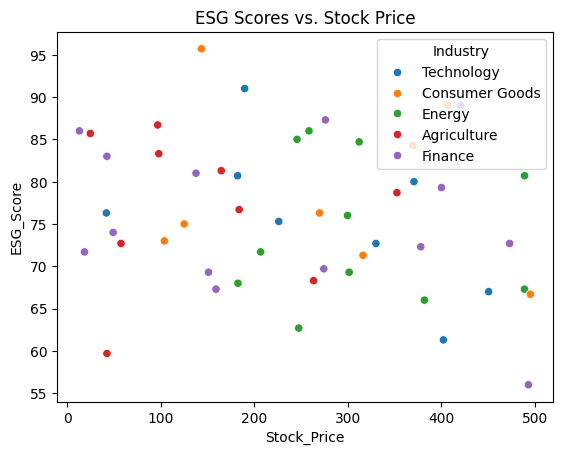

In [18]:
sns.scatterplot(data=data, x='Stock_Price', y='ESG_Score', hue='Industry')
plt.title('ESG Scores vs. Stock Price')
plt.show()


ENVIRONMENTAL VS. GOVERNANCE SCORES


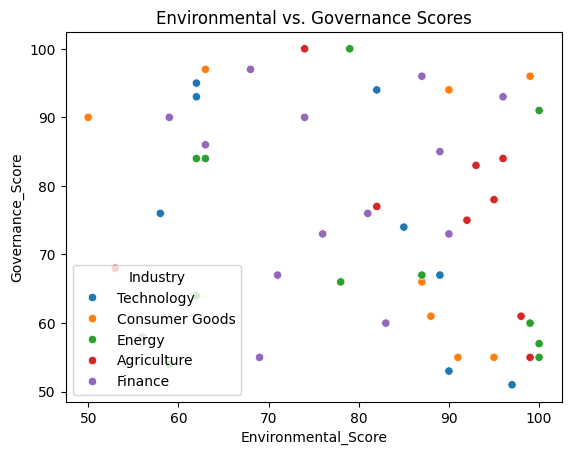

In [19]:
sns.scatterplot(data=data, x='Environmental_Score', y='Governance_Score', hue='Industry')
plt.title('Environmental vs. Governance Scores')
plt.show()


REVENUE VS. ESG SCORE


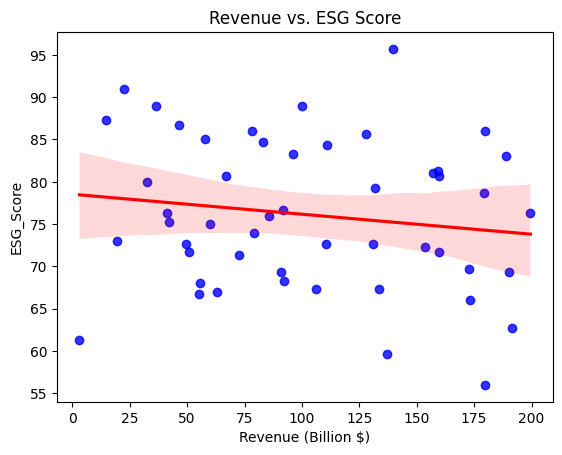

In [20]:
sns.regplot(data=data, x='Revenue (Billion $)', y='ESG_Score', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Revenue vs. ESG Score')
plt.show()


TOP COMPANIES OF ESG SCORE


In [21]:
top_companies = data.nlargest(5, 'ESG_Score')
print(top_companies[['Company', 'ESG_Score']])


                     Company  ESG_Score
12   Global Impact Solutions       95.7
46   GlobalGreen Initiatives       91.0
16      GreenSky Innovations       89.0
30  Sustainable Futures Inc.       89.0
37        BrightPlanet Group       87.3


BOTTOM COMPANIES OF ESG SCORE


In [22]:
bottom_companies = data.nsmallest(5, 'ESG_Score')
print(bottom_companies[['Company', 'ESG_Score']])


                 Company  ESG_Score
18  GreenGrowth Partners       56.0
49   RenewableEdge Corp.       59.7
32   GreenCore Solutions       61.3
14    Visionary Ventures       62.7
43      EcoOptimize Inc.       66.0


CO2 EMISSIONS BY INDUSTRY


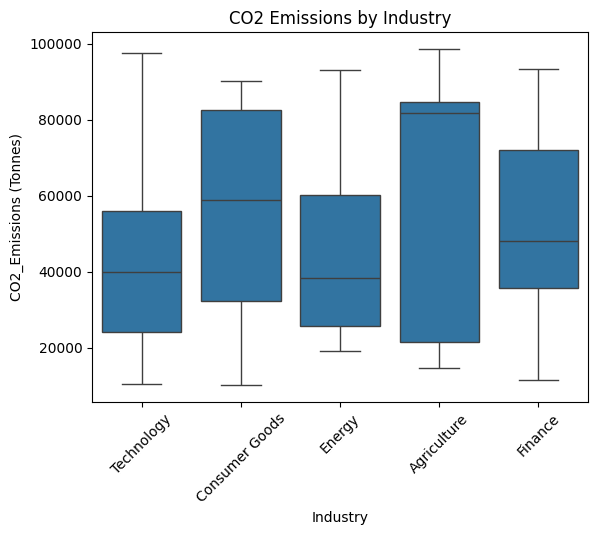

In [23]:
sns.boxplot(data=data, x='Industry', y='CO2_Emissions (Tonnes)')
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Industry')
plt.show()


ESG PERFORMANCE OVER TIME BY COUNTRY


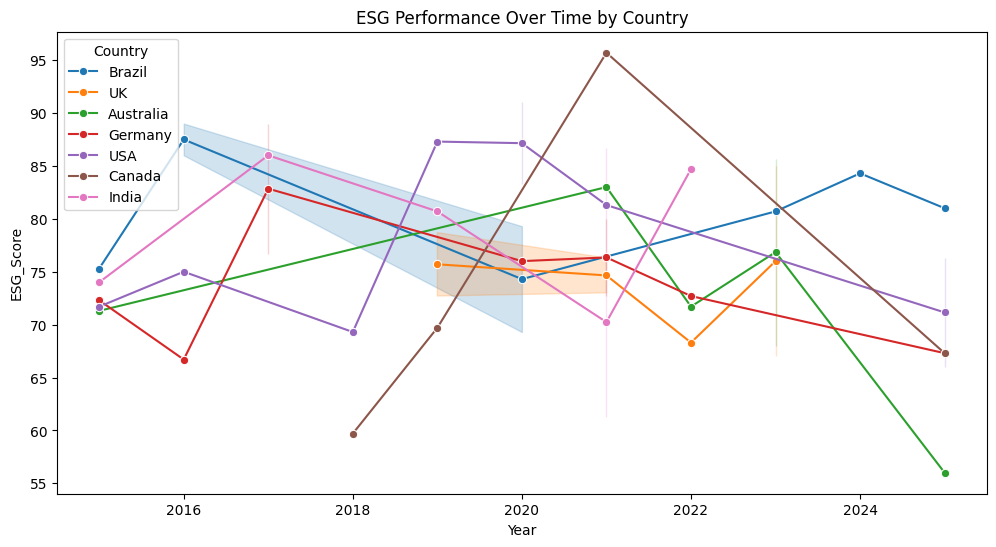

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='ESG_Score', hue='Country', marker='o')
plt.title('ESG Performance Over Time by Country')
plt.show()


ESG SCORES BY NEWS SENTIMENT


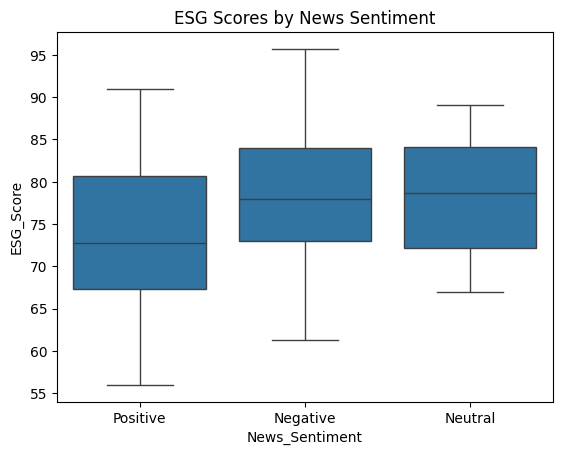

In [25]:
sns.boxplot(data=data, x='News_Sentiment', y='ESG_Score')
plt.title('ESG Scores by News Sentiment')
plt.show()


INDUSTRY-WISE ESG TRENDS


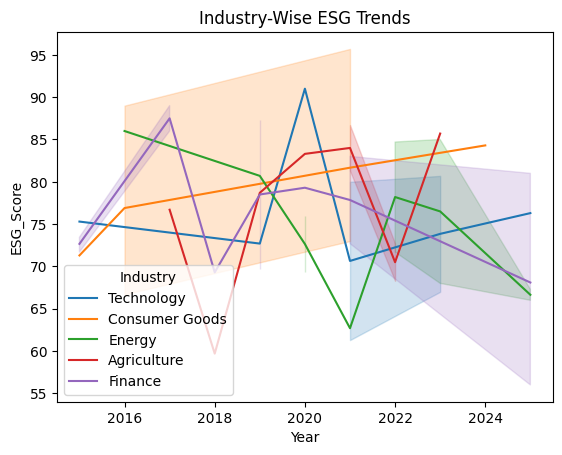

In [26]:
sns.lineplot(data=data, x='Year', y='ESG_Score', hue='Industry')
plt.title('Industry-Wise ESG Trends')
plt.show()


ESG SCORES AND MARKET CAPITALIZATION


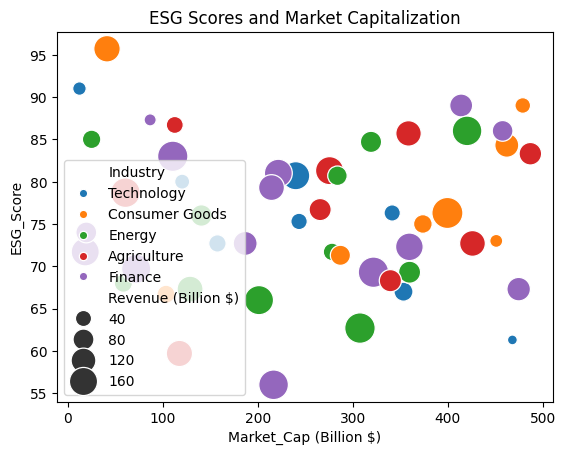

In [27]:
sns.scatterplot(data=data, x='Market_Cap (Billion $)', y='ESG_Score', size='Revenue (Billion $)', hue='Industry', sizes=(50, 500))
plt.title('ESG Scores and Market Capitalization')
plt.show()


ESG HEATMAP FOR COMPANIES


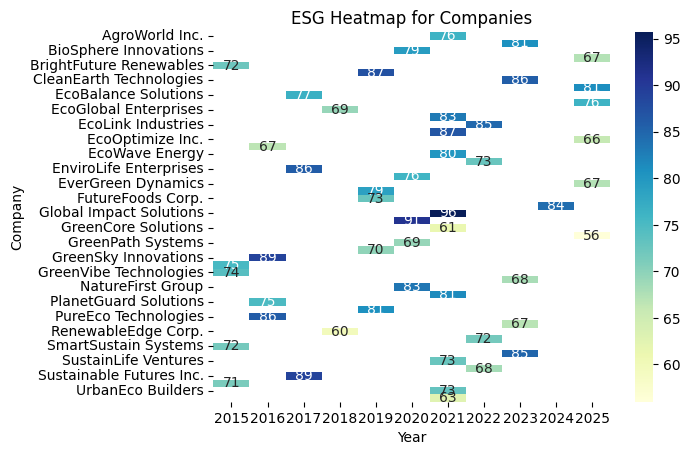

In [28]:
pivot_table = data.pivot_table(values='ESG_Score', index='Company', columns='Year')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('ESG Heatmap for Companies')
plt.show()


ESG EFFICIENCY RATIO


In [29]:
data['ESG_Efficiency_Ratio'] = data['ESG_Score'] / data['Market_Cap (Billion $)']

esg_efficiency = data[['Company', 'ESG_Efficiency_Ratio']]
print(esg_efficiency)


                     Company  ESG_Efficiency_Ratio
0             GreenTech Ltd.              0.309113
1             AgroWorld Inc.              0.190893
2             RenewablesPlus              0.257636
3          FutureFoods Corp.              0.461002
4         FinSecure Holdings              1.292282
5             EcoWave Energy              0.663350
6       SustainLife Ventures              0.388978
7          PureHarvest Farms              0.189533
8           SolarSphere Inc.              3.359684
9          GreenPath Systems              0.192553
10   BrightFuture Renewables              0.201001
11       NextGen Agriculture              0.294886
12   Global Impact Solutions              2.306024
13         UrbanEco Builders              0.161827
14        Visionary Ventures              0.203770
15   CleanEarth Technologies              0.238852
16      GreenSky Innovations              0.185804
17      Sustainable Horizons              0.248346
18      GreenGrowth Partners   

FINANCIAL SUSTAINABILITY SCORE


In [30]:
data['Financial_Sustainability_Score'] = data['Market_Cap (Billion $)'] / data['ESG_Score']

financial_sustainability = data[['Company', 'Financial_Sustainability_Score']]
print(financial_sustainability)


                     Company  Financial_Sustainability_Score
0             GreenTech Ltd.                        3.235060
1             AgroWorld Inc.                        5.238532
2             RenewablesPlus                        3.881450
3          FutureFoods Corp.                        2.169188
4         FinSecure Holdings                        0.773825
5             EcoWave Energy                        1.507500
6       SustainLife Ventures                        2.570839
7          PureHarvest Farms                        5.276119
8           SolarSphere Inc.                        0.297647
9          GreenPath Systems                        5.193362
10   BrightFuture Renewables                        4.975104
11       NextGen Agriculture                        3.391144
12   Global Impact Solutions                        0.433647
13         UrbanEco Builders                        6.179452
14        Visionary Ventures                        4.907496
15   CleanEarth Technolo

NEWS SENTIMENT SCORE


In [31]:
from textblob import TextBlob

data['News_Sentiment_Score'] = data['News_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

correlation_sentiment = data[['News_Sentiment_Score', 'ESG_Score']].corr()
print(correlation_sentiment)

                      News_Sentiment_Score  ESG_Score
News_Sentiment_Score              1.000000  -0.209984
ESG_Score                        -0.209984   1.000000


FEATURE IMPORTANCE FOR PREDICTING ESG SCORES


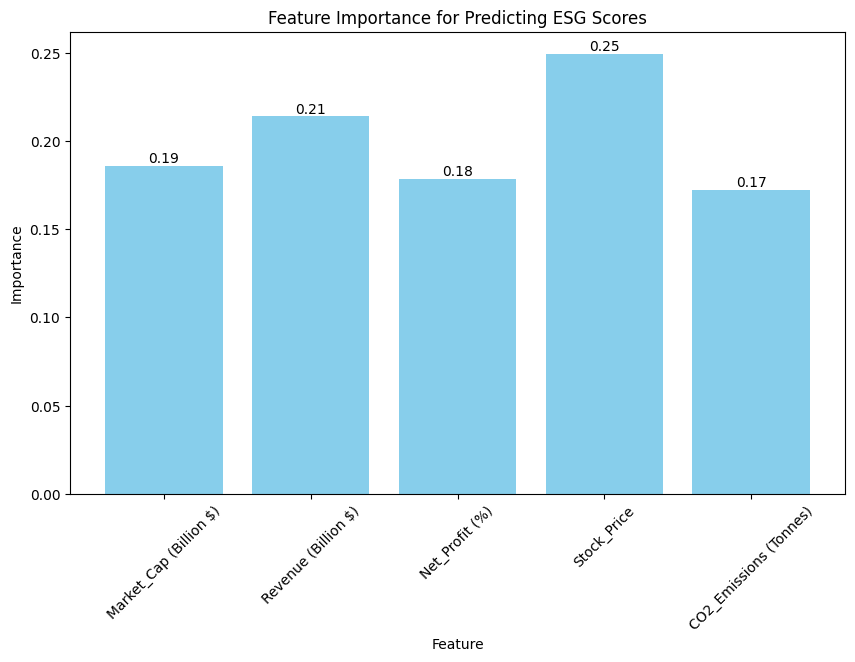

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = data[['Market_Cap (Billion $)', 'Revenue (Billion $)', 'Net_Profit (%)', 'Stock_Price', 'CO2_Emissions (Tonnes)']]
y = data['ESG_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = ['Market_Cap (Billion $)', 'Revenue (Billion $)', 'Net_Profit (%)', 'Stock_Price', 'CO2_Emissions (Tonnes)']

plt.figure(figsize=(10, 6))
bars = plt.bar(features, importances, color='skyblue')

for bar, importance in zip(bars, importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{importance:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Predicting ESG Scores')
plt.xticks(rotation=45)
plt.show()

PREDICTED STOCK PRICE

In [ ]:
from sklearn.linear_model import LinearRegression


X_stock = data[['ESG_Score', 'Market_Cap (Billion $)', 'Revenue (Billion $)', 'Net_Profit (%)']]
y_stock = data['Stock_Price']

stock_model = LinearRegression()
stock_model.fit(X_stock, y_stock)

data['Predicted_Stock_Price'] = stock_model.predict(X_stock)

data[['Company', 'Stock_Price', 'Predicted_Stock_Price']]


,Company,Stock_Price,Predicted_Stock_Price
0,GreenTech Ltd.,226.30,279.844204
1,AgroWorld Inc.,269.81,227.277652
2,RenewablesPlus,206.92,261.373442
3,FutureFoods Corp.,330.12,268.413234
4,FinSecure Holdings,352.52,206.243933
5,EcoWave Energy,370.74,250.744104
6,SustainLife Ventures,472.96,267.722985
7,PureHarvest Farms,450.55,295.644718
8,SolarSphere Inc.,245.80,242.519732
9,GreenPath Systems,301.48,298.266969
